# HW Web Crawling for Data Collection

## Question 1: Business Questions

        1. Does price impact rating/quality
        2. Does brand impact rating/quality
        3. Does number of ratings impact rating/quality

## Question 2: Building the web crawler

In [79]:
# importing required libraries
import requests
from lxml import html
import csv
import pandas as pd

In [80]:
# Testing to make sure my code works on the first page

r = requests.get('http://webscraperio.us-east-1.elasticbeanstalk.com/test-sites/e-commerce/static/computers/laptops?page=1')
data = html.fromstring(r.text)

# Xpath
alldata =[]

for i in data.xpath("//div[@class='thumbnail']"):     
    url = i.xpath("div[@class='caption']/h4/a/@href")  
    brand = i.xpath("div[@class='caption']/h4/a/text()")
    price = i.xpath("div[@class='caption']/h4[@class='pull-right price']/text()")
    num_reviews = i.xpath("div[@class='ratings']/p[@class='pull-right']/text()")
    rating = i.xpath("div[@class='ratings']/p/@data-rating")
    alldata.append([url, brand, price, num_reviews, rating])
    
len(alldata)

6

In [81]:
print alldata

[[['/test-sites/e-commerce/static/product/222'], ['Packard 255 G2'], ['$416.99'], ['2 reviews'], ['2']], [['/test-sites/e-commerce/static/product/223'], ['Aspire E1-510'], ['$306.99'], ['2 reviews'], ['3']], [['/test-sites/e-commerce/static/product/224'], ['ThinkPad T540p'], ['$1178.99'], ['2 reviews'], ['1']], [['/test-sites/e-commerce/static/product/225'], ['ProBook'], ['$739.99'], ['8 reviews'], ['4']], [['/test-sites/e-commerce/static/product/226'], ['ThinkPad X240'], ['$1311.99'], ['12 reviews'], ['3']], [['/test-sites/e-commerce/static/product/227'], ['Aspire E1-572G'], ['$581.99'], ['2 reviews'], ['1']]]


In [82]:
# Web crawling all 20 pages
finaldata = []

web = "http://webscraperio.us-east-1.elasticbeanstalk.com/test-sites/e-commerce/static/computers/laptops?page=%s" 

for page in range(1,21):
    url = web % page   
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    for i in data.xpath("//div[@class='thumbnail']"):     
        url = i.xpath("div[@class='caption']/h4/a/@href")  
        brand = i.xpath("div[@class='caption']/h4/a/text()")
        price = i.xpath("div[@class='caption']/h4[@class='pull-right price']/text()")
        num_reviews = i.xpath("div[@class='ratings']/p[@class='pull-right']/text()")
        rating = i.xpath("div[@class='ratings']/p/@data-rating")
        finaldata.append([url, brand, price, num_reviews, rating])


## Question 3: Data Cleaning and Preprocessing

In [83]:
# Converting to a dataframe

df = pd.DataFrame(finaldata)
df.head(2)

,0,1,2,3,4
0,[/test-sites/e-commerce/static/product/222],[Packard 255 G2],[$416.99],[2 reviews],[2]
1,[/test-sites/e-commerce/static/product/223],[Aspire E1-510],[$306.99],[2 reviews],[3]


In [84]:
# remove brackets

df[0] = df[0].astype(str).str.replace('\[|\]', '')
df[1] = df[1].astype(str).str.replace('\[|\]', '')
df[2] = df[2].astype(str).str.replace('\[|\]', '')
df[3] = df[3].astype(str).str.replace('\[|\]', '')
df[4] = df[4].astype(str).str.replace('\[|\]', '')
df.head(2)

,0,1,2,3,4
0,'/test-sites/e-commerce/static/product/222','Packard 255 G2','$416.99','2 reviews','2'
1,'/test-sites/e-commerce/static/product/223','Aspire E1-510','$306.99','2 reviews','3'


In [85]:
# remove single quotation

df[0] = df[0].str.replace(r'\'','')
df[1] = df[1].str.replace(r'\'','')
df[2] = df[2].str.replace(r'\'','')
df[3] = df[3].str.replace(r'\'','')
df[4] = df[4].str.replace(r'\'','')
df.head(2)

,0,1,2,3,4
0,/test-sites/e-commerce/static/product/222,Packard 255 G2,$416.99,2 reviews,2
1,/test-sites/e-commerce/static/product/223,Aspire E1-510,$306.99,2 reviews,3


In [86]:
df.rename(columns={0:'url', 1:'brand', 2:'price', 3:'num_reviews', 4:'rating'},inplace=True)
df.head(2)

,url,brand,price,num_reviews,rating
0,/test-sites/e-commerce/static/product/222,Packard 255 G2,$416.99,2 reviews,2
1,/test-sites/e-commerce/static/product/223,Aspire E1-510,$306.99,2 reviews,3


In [87]:
df['price'] = df['price'].astype(str).str.replace('$', '')
df.head(1)

,url,brand,price,num_reviews,rating
0,/test-sites/e-commerce/static/product/222,Packard 255 G2,416.99,2 reviews,2


In [88]:
df['num_reviews'] = df['num_reviews'].astype(str).str.replace('reviews', '')
df.head(1)

,url,brand,price,num_reviews,rating
0,/test-sites/e-commerce/static/product/222,Packard 255 G2,416.99,2,2


In [89]:
df['brand'] = df['brand'].astype(str).str.lower()
df.head(1)

,url,brand,price,num_reviews,rating
0,/test-sites/e-commerce/static/product/222,packard 255 g2,416.99,2,2


In [90]:
df['url'] = "http://webscraperio.us-east-1.elasticbeanstalk.com/" + df['url']

In [91]:
df.head(1)

,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,packard 255 g2,416.99,2,2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
url            117 non-null object
brand          117 non-null object
price          117 non-null object
num_reviews    117 non-null object
rating         117 non-null object
dtypes: object(5)
memory usage: 4.6+ KB


In [93]:
df['price'] = df['price'].astype(float)

In [94]:
df['num_reviews'] = df['num_reviews'].astype(int)

In [95]:
df['rating'] = df['rating'].astype(int)

In [96]:
df['brand'] = df['brand'].str.split()
df.head(1)

,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,"[packard, 255, g2]",416.99,2,2


In [103]:
for index, row in df.iterrows():
    df['brand'][index] = df['brand'][index][0]
df.head(1)

/Users/Eric/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,packard,416.99,2,2


In [104]:
df['brand'].nunique()

16

In [105]:
df.groupby('brand').size()

brand
acer         25
apple         3
aspire        2
asus         19
dell         20
hewlett       3
hp            2
inspiron      1
lenovo       20
msi           7
packard       1
pavilion      1
prestigio     2
probook       1
thinkpad      5
toshiba       5
dtype: int64

In [107]:
df['brand'].replace('hewlett', 'hp', inplace=True)


,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,packard,416.99,2,2


In [108]:
df['brand'].replace('packard', 'hp', inplace=True)
df.head(1)

,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,hp,416.99,2,2


In [113]:
df.groupby('brand').size()

brand
acer         25
apple         3
aspire        2
asus         19
dell         20
hp            6
inspiron      1
lenovo       20
msi           7
pavilion      1
prestigio     2
probook       1
thinkpad      5
toshiba       5
dtype: int64

In [114]:
df['brand'] = df['brand'].replace({'acer':1, 'apple':2, 'aspire':3, 'asus':4, 'dell':5, 'hp':6, 'inspiron':7, 'lenovo':8, 'msi':9, 'pavilion':10, 'prestigio':11, 'probook':12, 'thinkpad':13, 'toshiba':14})

In [115]:
df.head(5)

,url,brand,price,num_reviews,rating
0,http://webscraperio.us-east-1.elasticbeanstalk...,6,416.99,2,2
1,http://webscraperio.us-east-1.elasticbeanstalk...,3,306.99,2,3
2,http://webscraperio.us-east-1.elasticbeanstalk...,13,1178.99,2,1
3,http://webscraperio.us-east-1.elasticbeanstalk...,12,739.99,8,4
4,http://webscraperio.us-east-1.elasticbeanstalk...,13,1311.99,12,3


## Question 4: Data anlysis and descriptive analytics

In [116]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
url            117 non-null object
brand          117 non-null int64
price          117 non-null float64
num_reviews    117 non-null int64
rating         117 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.6+ KB


In [118]:
df.describe()

,brand,price,num_reviews,rating
count,117.000000,117.000000,117.000000,117.000000
mean,5.623932,909.393846,6.897436,2.341880
std,3.692318,401.311429,4.255594,1.107672
min,1.000000,295.990000,0.000000,1.000000
25%,3.000000,469.100000,3.000000,1.000000
50%,5.000000,1102.660000,7.000000,2.000000
75%,8.000000,1221.580000,10.000000,3.000000
max,14.000000,1799.000000,14.000000,4.000000


In [119]:
# Number of ratings per category
df.groupby('rating').size()

rating
1    37
2    24
3    35
4    21
dtype: int64

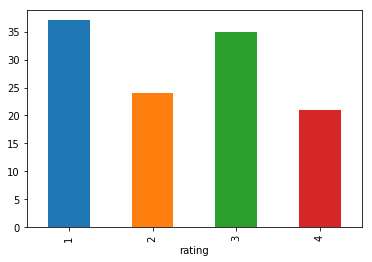

In [120]:
df.groupby('rating').size().plot(kind='bar')

In [53]:
# Number of ratings in each rating category grouped by number of reviews
df.groupby(['num_reviews','rating']).size().unstack()

rating,1,2,3,4
num_reviews,,,,
0,4.0,3.0,NaN,1.0
1,2.0,1.0,2.0,2.0
2,7.0,3.0,2.0,1.0
3,NaN,NaN,1.0,1.0
4,3.0,2.0,3.0,1.0
5,1.0,NaN,4.0,1.0
6,2.0,1.0,2.0,1.0
7,5.0,2.0,2.0,2.0
8,2.0,1.0,5.0,2.0


In [121]:
df.corr()

,brand,price,num_reviews,rating
brand,1.000000,0.246516,0.147301,-0.084222
price,0.246516,1.000000,0.076006,-0.095653
num_reviews,0.147301,0.076006,1.000000,0.168439
rating,-0.084222,-0.095653,0.168439,1.000000


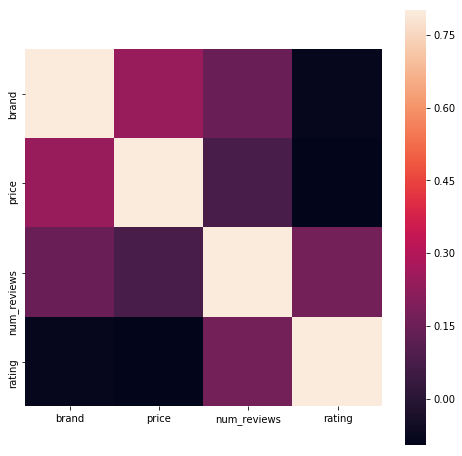

In [122]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),vmax=.8, square=True)

In [132]:
df.groupby(['brand','rating']).mean()

price  num_reviews
brand rating                          
1     1        754.646667     3.500000
      2        707.393333     2.666667
      3        660.500000     8.714286
      4        420.885000     8.500000
2     1       1333.000000     0.000000
      2       1347.780000    11.000000
      4       1260.130000     8.000000
3     1        581.990000     2.000000
      3        306.990000     2.000000
4     1        978.518571     5.714286
      2       1045.440000     7.000000
      3       1020.418000     8.000000
      4        959.662500     5.250000
5     1       1075.131667     7.500000
      2       1085.246667     6.000000
      3       1209.801250     6.250000
      4        922.000000    11.000000
6     1        845.645000     7.000000
      2        505.323333     8.333333
      3       1273.110000     8.000000
7     3        745.990000    12.000000
8     1        838.330000     9.250000
      2        762.198000     8.200000
      3        807.595000     8.000000
      4       1140.363333     5.000000
9     1       1156.500000     7.250000
      2       1199.000000    12.000000
      3       1299.000000     1.000000
      4       1099.000000     1.000000
10    1        609.990000     4.000000
11    2        299.000000     8.000000
      4        299.000000    12.000000
12    4        739.990000     8.000000
13    1       1178.990000     2.000000
      2       1033.990000    13.000000
      3       1260.323333     8.000000
14    1       1232.412500     6.000000
      4       1203.410000    13.000000

#### This groupby is consistent with the general trend that as a computer's price increases, its rating goes down.

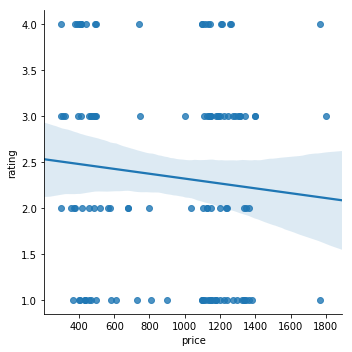

In [123]:
sns.lmplot('price', 'rating', df)

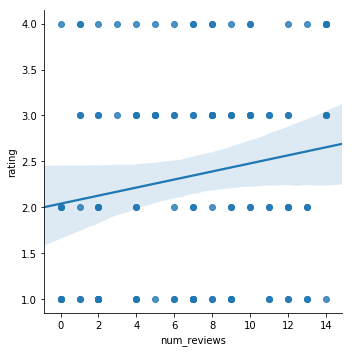

In [124]:
sns.lmplot('num_reviews', 'rating', df)

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [65]:
print pairwise_tukeyhsd(df['rating'], df['num_reviews'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.8214  -1.1025 2.7454 False 
  0      2     0.0192  -1.6512 1.6897 False 
  0      3      1.75   -1.1889 4.6889 False 
  0      4     0.4722  -1.3341 2.2786 False 
  0      5     1.0833  -0.9243 3.091  False 
  0      6     0.5833  -1.4243 2.591  False 
  0      7     0.3409  -1.3865 2.0683 False 
  0      8      0.95   -0.8134 2.7134 False 
  0      9      0.35   -1.4134 2.1134 False 
  0      10     1.25   -0.6087 3.1087 False 
  0      11     0.25   -1.7577 2.2577 False 
  0      12     0.5    -1.3587 2.3587 False 
  0      13     0.25   -1.8693 2.3693 False 
  0      14     1.5    -0.3587 3.3587 False 
  1      2    -0.8022   -2.545 0.9406 False 
  1      3     0.9286   -2.052 3.9092 False 
  1      4    -0.3492  -2.2226 1.5242 False 
  1      5     0.2619  -1.8063 2.3301 False 
  1      6    -0.2381  -2.3063 1.8301 False 
  1 

In [125]:
print pairwise_tukeyhsd(df['rating'], df['brand'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.1867  -2.5348 2.1615 False 
  1      3     -0.52   -3.3441 2.3041 False 
  1      4    -0.2042  -1.3739 0.9654 False 
  1      5     -0.12   -1.2729 1.0329 False 
  1      6    -0.6867  -2.4338 1.0604 False 
  1      7      0.48   -3.4392 4.3992 False 
  1      8     -0.02   -1.1729 1.1329 False 
  1      9    -0.6629  -2.3062 0.9805 False 
  1      10    -1.52   -5.4392 2.3992 False 
  1      11     0.48   -2.3441 3.3041 False 
  1      12     1.48   -2.4392 5.3992 False 
  1      13    -0.12   -2.0027 1.7627 False 
  1      14    -0.92   -2.8027 0.9627 False 
  2      3    -0.3333  -3.8416 3.1749 False 
  2      4    -0.0175  -2.4051  2.37  False 
  2      5     0.0667  -2.3127 2.4461 False 
  2      6      -0.5   -3.2175 2.2175 False 
  2      7     0.6667  -3.7709 5.1043 False 
  2      8     0.1667  -2.2127 2.5461 False 
  2 

## Question 5: Answering our Original Questions

#### #1. Does price impact rating/quality
       

##### There is a general trend that as price increases, the rating of a computer tends to go down, however there is only a weak negative linear correlation between price and rating.

#### #2. Does brand impact rating/quality

##### After using Tukey's HSD method for multiple comparison, there were no brands that had a signficantly higher or lower rating than any other brand, so we can conclude that brand is not a significant predictor of a product's rating/quality

#### #3. Does number of ratings impact rating/quality

##### From the linear regression plot, there is a moderate positive linear correlation between the number of reviews a product has and its overall rating/quality. However, after running Tukey's HSD method for multiple comparison, there were no statistical differences in mean rating between any of the number of ratings on a particular product.

## "On my honor as a student, I have neither given nor recieved any unauthorized aid on this academic work."

Eric VanMeerhaeghe